# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("data.csv").copy()

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:

X = df.drop(columns=["country"])

X = X.to_numpy()

#standardization
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X_scaled = (X - mean) / std

In [6]:
def kmeans(X, K=3, max_iters=100):
    
    np.random.seed(10)
    #selecting random points 
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[random_indices]
    
    for _ in range(max_iters):
        #finding distances from the centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([
            X[cluster_labels == k].mean(axis=0)
            for k in range(K)
        ])
        
        # Stop if centroids don't change
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return cluster_labels, centroids


In [7]:
labels_kmeans, centroids = kmeans(X_scaled, K=3)
print("K-Means Cluster Labels:", labels_kmeans)
print("K-Means Centroids:", centroids)

K-Means Cluster Labels: [1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]
K-Means Centroids: [[-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]]


In [8]:
# Compute covariance
cov = np.cov(X_scaled.T)

eigenvalues, eigenvectors = np.linalg.eig(cov)

# Sorting 
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# Taking the first 2 components
W = eigenvectors[:, :2]

X_2d = X_scaled @ W


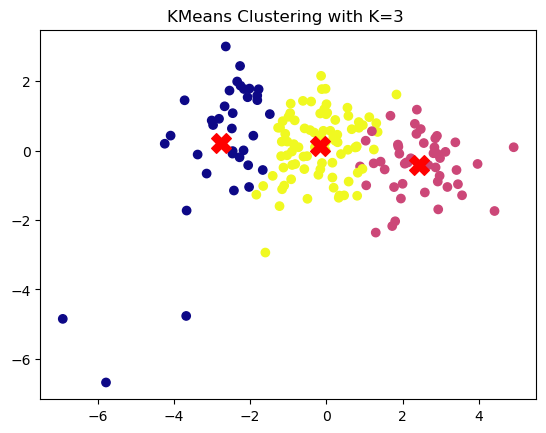

In [9]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_kmeans, cmap='plasma')
plt.scatter((centroids @ W)[:, 0], (centroids @ W)[:, 1],
            c='red', marker='X', s=200)
plt.title("KMeans Clustering with K=3 ")
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, labels_kmeans)

print("Silhouette Score (K-Means, K=3):", sil_score)


Silhouette Score (K-Means, K=3): 0.28329575683463126


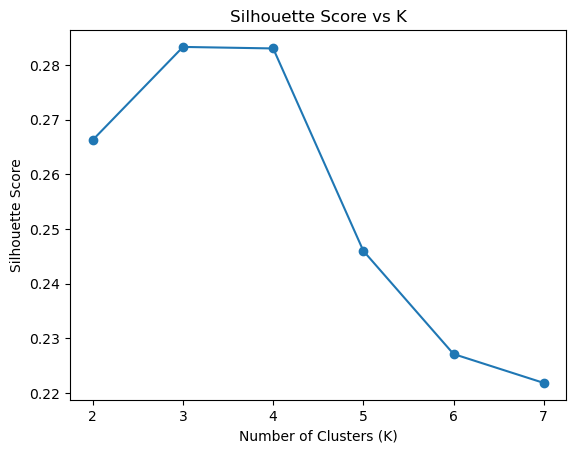

[(2, 0.2662961111870726), (3, 0.28329575683463126), (4, 0.28301780186796405), (5, 0.24599384094409965), (6, 0.2271395907512573), (7, 0.22185583638437356)]


In [11]:
from sklearn.metrics import silhouette_score

K_values = range(2, 8)
scores = []

for k in K_values:
    labels, _ = kmeans(X_scaled, K=k)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

plt.figure()
plt.plot(K_values, scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()

print(list(zip(K_values, scores)))


## Heirarchical Clustering

In [12]:

def hierarchical_clustering(X, K=3):
    n = len(X)

    # Start: each point is its own cluster
    clusters = [[i] for i in range(n)]

    # Precompute distance matrix
    dist_matrix = np.linalg.norm(
        X[:, np.newaxis] - X[np.newaxis, :],
        axis=2
    )

    while len(clusters) > K:

        min_dist = float('inf')
        merge_pair = (0, 1)

        # Find closest pair of clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):

                # average linkage
                dists = [
                    dist_matrix[a][b]
                    for a in clusters[i]
                    for b in clusters[j]
                ]

                avg_dist = np.mean(dists)

                if avg_dist < min_dist:
                    min_dist = avg_dist
                    merge_pair = (i, j)

        i, j = merge_pair

        # Merge clusters
        clusters[i] += clusters[j]
        clusters.pop(j)

    # Create labels
    labels = np.zeros(n, dtype=int)
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            labels[point] = idx

    return labels


In [13]:
labels_hier = hierarchical_clustering(X_scaled, K=3)


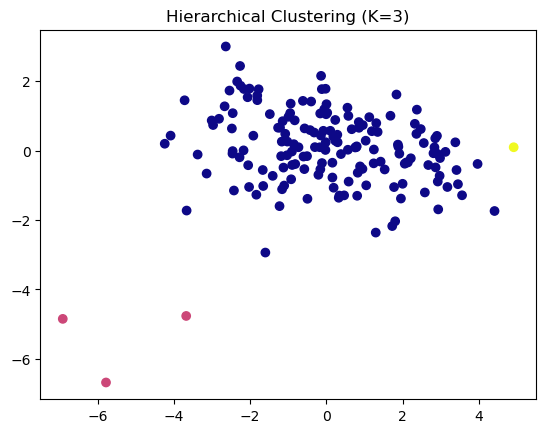

In [14]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_hier, cmap='plasma')
plt.title("Hierarchical Clustering (K=3)")
plt.show()


In [15]:
sil_score_hier = silhouette_score(X_scaled, labels_hier)
print("Silhouette Score (Hierarchical, K=3):", sil_score_hier)


Silhouette Score (Hierarchical, K=3): 0.5620472870560562


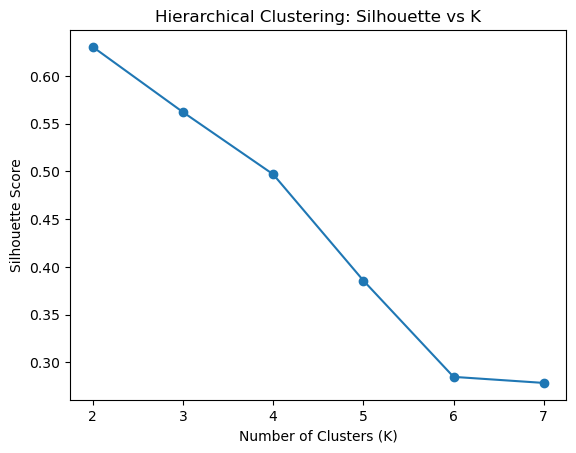

[(2, 0.6303375987432929), (3, 0.5620472870560562), (4, 0.4969597084434549), (5, 0.3857846313243115), (6, 0.28495047248750505), (7, 0.2786082504087725)]


In [16]:
scores_hier = []

for k in K_values:
    labels = hierarchical_clustering(X_scaled, K=k)
    score = silhouette_score(X_scaled, labels)
    scores_hier.append(score)

plt.figure()
plt.plot(K_values, scores_hier, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Hierarchical Clustering: Silhouette vs K")
plt.show()

print(list(zip(K_values, scores_hier)))


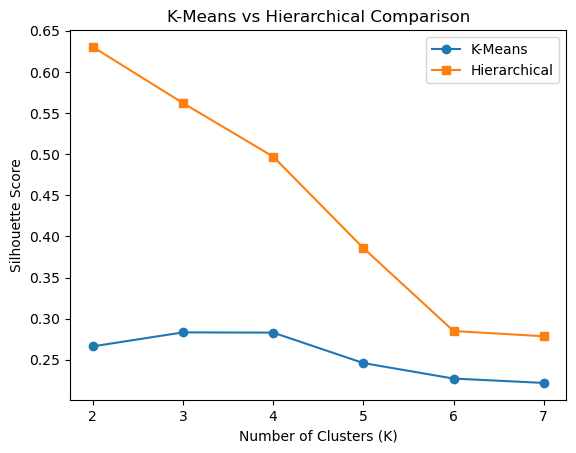

In [17]:
K_values = range(2, 8)
scores_kmeans = []
scores_hier = []

for k in K_values:
    labels_k, _ = kmeans(X_scaled, K=k)
    labels_h = hierarchical_clustering(X_scaled, K=k)

    scores_kmeans.append(silhouette_score(X_scaled, labels_k))
    scores_hier.append(silhouette_score(X_scaled, labels_h))

plt.figure()
plt.plot(K_values, scores_kmeans, marker='o', label='K-Means')
plt.plot(K_values, scores_hier, marker='s', label='Hierarchical')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("K-Means vs Hierarchical Comparison")
plt.legend()
plt.show()


Hierarchical clustering consistently outperforms K-means for all values of K (higher silhouette scores at every point).